In [1]:
import numpy as np
from mkutils import create_fig, save_to_file
import copy
import matplotlib as plt

In [11]:
profile = np.loadtxt('bsResult.xvg', comments=['@', '#'])
histo = np.loadtxt('histo.xvg', comments=['@', '#'])
frames = np.loadtxt('frames.dat', skiprows=4, usecols=[0,1])
complete = np.loadtxt('../complete.txt')
#frames = np.concatenate((frames, frames_hf))
frames = [item for item in frames if item[0] in complete]


In [16]:
martini = np.loadtxt('../../../MARTINI.csv', delimiter=',')
sdk = np.loadtxt('../../../SDK.csv', delimiter=',')
charmm = np.loadtxt('../../../CHARMM.csv', delimiter=',')

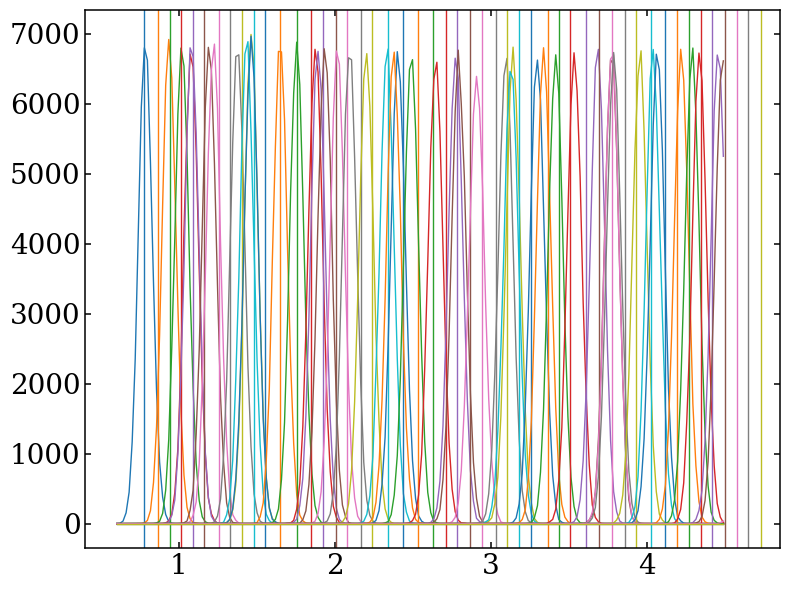

In [9]:
fig, axes = create_fig(1, 1)
ax = axes[0]

for i, (frame, distance) in enumerate(frames): 
    ci = int(i - (np.floor(i/10) * 10))
    ax.plot(histo[:, 0], histo[:, i+1], color='C{:d}'.format(ci))
    ax.axvline(x=distance, color='C{:d}'.format(ci))
    #print('C{:d} : frame {:d}, distance: {:.3f}'.format(ci, int(frame), distance))
#print('\n')



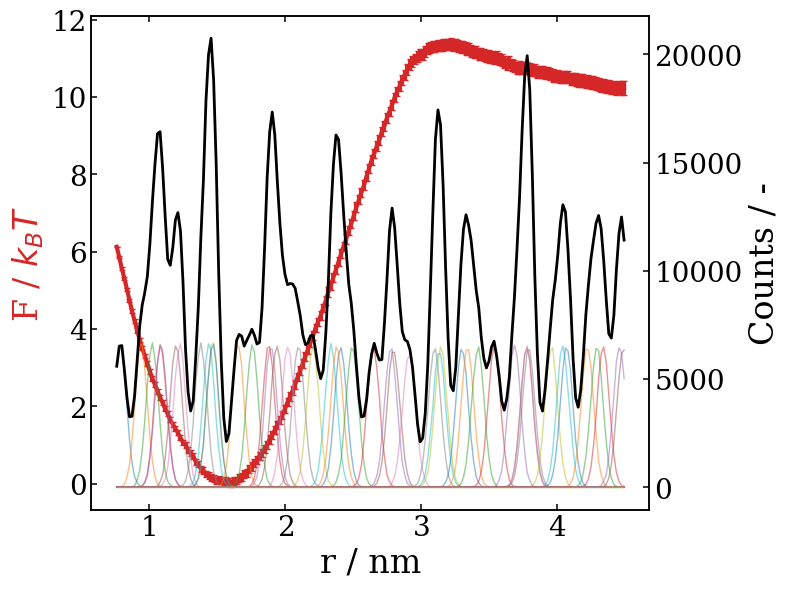

In [12]:
histofig, ax = create_fig(1,1)
ax = ax[0]

ax2 = ax.twinx()
cor_prof = copy.deepcopy(profile)
cor_prof[:, 1] += 2.*np.log(cor_prof[:, 0])
ax.errorbar(profile[:,0], profile[:,1]-np.amin(profile[:,1]), profile[:,2], capsize=2, color='C3', lw=3)
#ax.errorbar(cor_prof[:,0], cor_prof[:,1]-np.amin(cor_prof[:,1]), profile[:,2], capsize=2, color='C3', lw=3)

cum_hist = np.zeros((histo[:, :2].shape))
cum_hist[:, 0] = histo[:, 0]
for i in range(1,len(histo[0,:])):
    ax2.plot(histo[:,0], histo[:,i], alpha=0.5)
    cum_hist[:, 1] += histo[:, i]
    
ax2.plot(cum_hist[:, 0], cum_hist[:,1], color='k', lw=2)
ax.set_xlabel('r / nm')
ax.set_ylabel('F / $k_BT$', color='C3')
ax2.set_ylabel('Counts / -')
save_to_file('F')

No handles with labels found to put in legend.


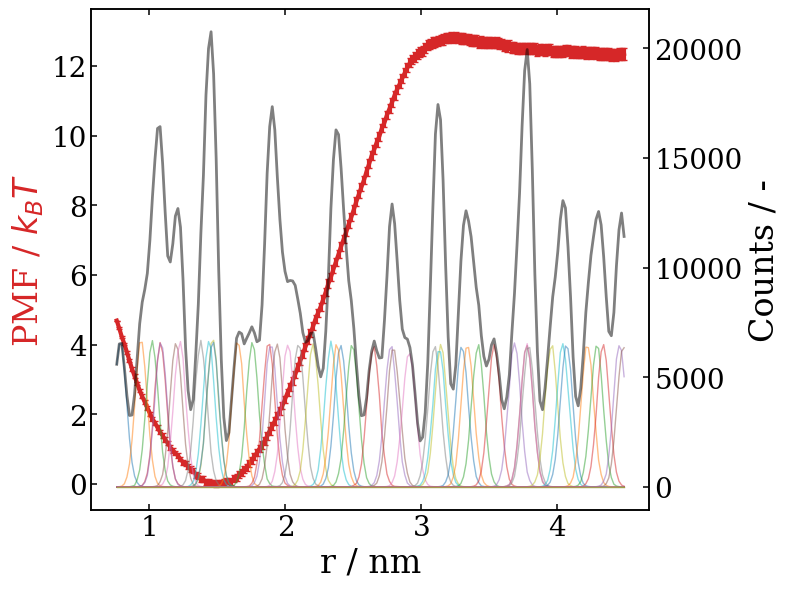

In [13]:
histofig, ax = create_fig(1,1)
ax = ax[0]

ax2 = ax.twinx()
cor_prof = copy.deepcopy(profile)
cor_prof[:, 1] += 2.*np.log(cor_prof[:, 0])
ax.errorbar(cor_prof[:,0], cor_prof[:,1]-np.amin(cor_prof[:,1]), profile[:,2], capsize=2, color='C3', lw=3)



cum_hist = np.zeros((histo[:, :2].shape))
cum_hist[:, 0] = histo[:, 0]
for i in range(1,len(histo[0,:])):
    ax2.plot(histo[:,0], histo[:,i], alpha=0.5)
    cum_hist[:, 1] += histo[:, i]
    
ax2.plot(cum_hist[:, 0], cum_hist[:,1], color='k', lw=2, alpha=0.5)
ax.set_xlabel('r / nm')
ax.set_ylabel('PMF / $k_BT$', color='C3')
ax2.set_ylabel('Counts / -')
ax.legend()
save_to_file('PMF')

12.830634155453254
10.227478000000001


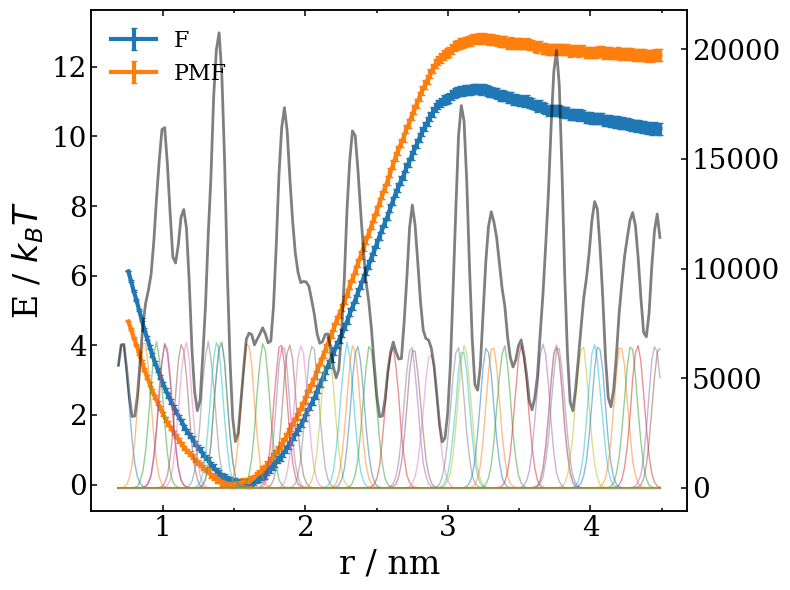

In [17]:
histofig, ax = create_fig(1,1)
ax = ax[0]
ax2 = ax.twinx()
cor_prof = copy.deepcopy(profile)
cor_prof[:, 1] += 2.*np.log(cor_prof[:, 0])
 
cum_hist = np.zeros((histo[:, :2].shape))
cum_hist[:, 0] = histo[:, 0]
for i in range(1,len(histo[0,:])):
    ax2.plot(histo[:,0], histo[:,i], alpha=0.5)
    cum_hist[:, 1] += histo[:, i]
    
ax2.plot(cum_hist[:, 0], cum_hist[:,1], color='k', lw=2,alpha=0.5)

ax.errorbar(profile[:,0], profile[:,1]-np.amin(profile[:,1]), profile[:,2], capsize=2, color='C0', lw=3, label='F')

ax.errorbar(cor_prof[:,0], cor_prof[:,1]-np.amin(cor_prof[:,1]), profile[:,2], capsize=2, color='C1', lw=3, label='PMF')   

ax.set_xlabel('r / nm')
ax.set_ylabel('E / $k_BT$')
ax.legend()
ax.set_xticks([0.5*i for i in range(1,10)], minor=True)

ax.tick_params(axis='both', which='both', direction='in', right=False, top=True)
print(max(cor_prof[:, 1]) - min(cor_prof[:, 1]))
print(profile[-1, 1] - min(profile[:, 1]))

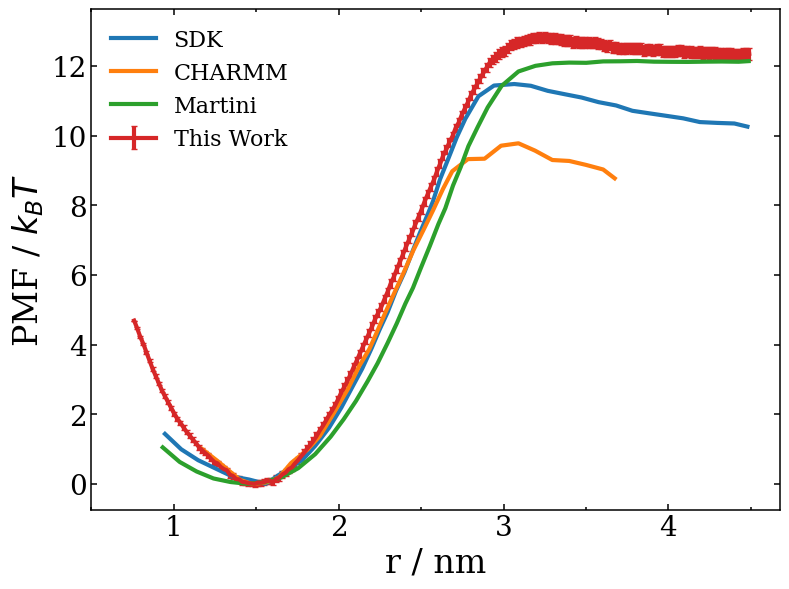

In [18]:
histofig, ax = create_fig(1,1)
ax = ax[0]

cor_prof = copy.deepcopy(profile)
cor_prof[:, 1] += 2.*np.log(cor_prof[:, 0])
#cor_prof[:, 2] += 2.*np.log(cor_prof[:, 0])
ax.errorbar(cor_prof[:,0], cor_prof[:,1]-np.amin(cor_prof[:,1]), cor_prof[:,2], capsize=2, color='C3', lw=3, label='This Work')
#ax.plot(cor_prof[:,0], cor_prof[:,1]-np.amin(cor_prof[:,1]), color='C3', lw=3, label='This Work')

ax.plot(sdk[:, 0], sdk[:, 1]-min(sdk[:,1]), lw=3, label='SDK')
ax.plot(charmm[:, 0], charmm[:, 1]-min(charmm[:, 1]), lw=3, label='CHARMM')
ax.plot(martini[:, 0], martini[:, 1]-min(martini[:, 1]), lw=3, label='Martini')

ax.set_xticks([0.5*i for i in range(1,10)], minor=True)

ax.tick_params(axis='both', which='both', direction='in', right=True, top=True)
ax.set_xlabel('r / nm')
ax.set_ylabel('PMF / $k_BT$')
ax2.set_ylabel('Counts / -')
ax.legend()
save_to_file('PMF_comp')

In [9]:
charmm

array([[1.16993624, 1.04328967],
       [1.26451642, 0.69539176],
       [1.35792894, 0.32325009],
       [1.40222576, 0.14854111],
       [1.47376789, 0.03713528],
       [1.55961844, 0.07427056],
       [1.63831479, 0.22281167],
       [1.71133965, 0.63303143],
       [1.81097968, 1.01970711],
       [1.8857097 , 1.40815822],
       [1.96511034, 2.02637402],
       [2.05618755, 2.75974767],
       [2.12391163, 3.41028848],
       [2.18618664, 3.9072855 ],
       [2.2266654 , 4.33559187],
       [2.28271292, 4.94774673],
       [2.34576637, 5.60232817],
       [2.39480794, 6.10538613],
       [2.45419162, 6.75130908],
       [2.51390891, 7.31959429],
       [2.57229174, 7.88730226],
       [2.63300988, 8.50551807],
       [2.68905739, 9.01221259],
       [2.78433816, 9.36051456],
       [2.88522369, 9.37168138],
       [2.98517509, 9.74518217],
       [3.09073124, 9.81394628],
       [3.19161676, 9.60295213],
       [3.29623879, 9.33421376],
       [3.39899256, 9.30703136],
       [3.